# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [1]:
import pandas as pd
import plotly.express as px

# Notebook Presentation

In [2]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [3]:
df_apps = pd.read_csv("apps.csv")

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [4]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
1707,Online Chat Girls Meet,DATING,4.70,18,5.00,500,Free,0,Mature 17+,Dating,"July 25, 2018",4.0.3 and up
6530,E! News,NEWS_AND_MAGAZINES,4.00,15443,25.00,"1,000,000",Free,0,Teen,News & Magazines,"June 19, 2018",4.4 and up
6637,Family Dollar,SHOPPING,4.30,2588,21.00,"1,000,000",Free,0,Everyone,Shopping,"July 23, 2018",4.1 and up
3283,J Dark Ice Substratum Theme,PERSONALIZATION,4.50,164,33.00,"10,000",Free,0,Everyone,Personalization,"July 19, 2018",6.0 and up
9593,Dragon Hills,GAME,4.50,354373,66.00,"10,000,000",Free,0,Everyone 10+,Action,"October 12, 2017",4.1 and up


In [5]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_MBs        10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Android_Ver     10839 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1016.5+ KB


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [6]:
df_apps.drop(["Last_Updated", "Android_Ver"], axis=1, inplace=True)

### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [7]:
df_apps

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business
...,...,...,...,...,...,...,...,...,...,...
10836,Subway Surfers,GAME,4.50,27723193,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10837,Subway Surfers,GAME,4.50,27724094,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10838,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10839,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade


In [8]:
df_apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size_MBs             0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
dtype: int64

In [9]:
df_apps_clean = df_apps.dropna().copy()
df_apps_clean

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
10836,Subway Surfers,GAME,4.50,27723193,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10837,Subway Surfers,GAME,4.50,27724094,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10838,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10839,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade


### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [10]:
df_apps_clean.duplicated().sum()

np.int64(476)

In [11]:
mask = df_apps_clean["App"]=="Instagram"
df_apps_clean[mask]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [12]:
df_apps_clean.drop_duplicates(inplace=True)

In [13]:
df_apps_clean.duplicated().sum()

np.int64(0)

In [14]:
mask = df_apps_clean["App"]=="Instagram"
df_apps_clean[mask]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [15]:
dp_mask = df_apps_clean["App"].duplicated()
duplicated_indicies = df_apps_clean[dp_mask].index
df_apps_clean.drop(duplicated_indicies, inplace=True)

In [16]:
df_apps_clean.duplicated().sum()

np.int64(0)

In [17]:
df_apps_clean["App"].duplicated().sum()

np.int64(0)

In [18]:
mask = df_apps_clean["App"]=="Instagram"
df_apps_clean[mask]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [19]:
df_apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8197 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8197 non-null   object 
 1   Category        8197 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         8197 non-null   int64  
 4   Size_MBs        8197 non-null   float64
 5   Installs        8197 non-null   object 
 6   Type            8197 non-null   object 
 7   Price           8197 non-null   object 
 8   Content_Rating  8197 non-null   object 
 9   Genres          8197 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 704.4+ KB


* We do need to convert `["Installs", "Price"]` columns type to integer & float respectively.

In [20]:
df_apps_clean.sort_values(
    by=["Rating", "Installs", "Reviews"],
    ascending=False
)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
1789,Ek Vote,PRODUCTIVITY,5.00,43,6.20,500,Free,0,Everyone,Productivity
1499,"Trinity Church Deltona, FL",LIFESTYLE,5.00,33,28.00,500,Free,0,Everyone,Lifestyle
1556,Catholic La Bu Zo Kam,BOOKS_AND_REFERENCE,5.00,23,5.70,500,Free,0,Everyone,Books & Reference
1550,Comunidad De Fe Minitries,LIFESTYLE,5.00,19,11.00,500,Free,0,Everyone,Lifestyle
1552,Dr. ES PV Calculator,TOOLS,5.00,19,11.00,500,Free,0,Everyone,Tools
...,...,...,...,...,...,...,...,...,...,...
240,House party - live chat,DATING,1.00,1,9.20,10,Free,0,Mature 17+,Dating
357,Speech Therapy: F,FAMILY,1.00,1,16.00,10,Paid,$2.99,Everyone,Education
1932,FE Mechanical Engineering Prep,FAMILY,1.00,2,21.00,"1,000",Free,0,Everyone,Education
2449,Tech CU Card Manager,FINANCE,1.00,2,7.20,"1,000",Free,0,Everyone,Finance


In [21]:
# Convert `Installs` column to integer
df_apps_clean["Installs"] = df_apps_clean["Installs"].apply(
    lambda x: int(x.replace(",", ""))
)

In [22]:
# Convert `Installs` column to integer
df_apps_clean["Price"] = df_apps_clean["Price"].apply(
    lambda x: float(x.replace("$", ""))
)

In [23]:
df_apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8197 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8197 non-null   object 
 1   Category        8197 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         8197 non-null   int64  
 4   Size_MBs        8197 non-null   float64
 5   Installs        8197 non-null   int64  
 6   Type            8197 non-null   object 
 7   Price           8197 non-null   float64
 8   Content_Rating  8197 non-null   object 
 9   Genres          8197 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 704.4+ KB


In [24]:
df_apps_clean.sort_values(
    by=["Rating", "Installs", "Reviews"],
    ascending=False
)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
4058,Ek Bander Ne Kholi Dukan,FAMILY,5.00,10,3.00,10000,Free,0.00,Everyone,Entertainment
3115,Oración CX,LIFESTYLE,5.00,103,3.80,5000,Free,0.00,Everyone,Lifestyle
2750,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.00,34,12.00,5000,Free,0.00,Everyone,Comics
3030,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.00,24,3.20,5000,Free,0.00,Everyone,Tools
2095,Ríos de Fe,LIFESTYLE,5.00,141,15.00,1000,Free,0.00,Everyone,Lifestyle
...,...,...,...,...,...,...,...,...,...,...
576,Clarksburg AH,MEDICAL,1.00,1,28.00,50,Free,0.00,Everyone,Medical
617,DT future1 cam,TOOLS,1.00,1,24.00,50,Free,0.00,Everyone,Tools
728,Truck Driving Test Class 3 BC,FAMILY,1.00,1,2.00,50,Paid,1.49,Everyone,Education
240,House party - live chat,DATING,1.00,1,9.20,10,Free,0.00,Mature 17+,Dating


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [25]:
df_apps_clean.sort_values(by="Size_MBs", ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9943,Miami crime simulator,GAME,4.00,254518,100.00,10000000,Free,0.00,Mature 17+,Action
9945,Ultimate Tennis,SPORTS,4.30,183004,100.00,10000000,Free,0.00,Everyone,Sports
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,10000000,Free,0.00,Mature 17+,Simulation
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,100000000,Free,0.00,Teen,Arcade
10295,SimCity BuildIt,FAMILY,4.50,4218587,100.00,50000000,Free,0.00,Everyone 10+,Simulation


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [26]:
df_apps_clean.sort_values(by="Reviews", ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,1000000000,Free,0.00,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,1000000000,Free,0.00,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,1000000000,Free,0.00,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,1000000000,Free,0.00,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,100000000,Free,0.00,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [27]:
ratings = df_apps_clean["Content_Rating"].value_counts().copy()
ratings

Content_Rating
Everyone           6619
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

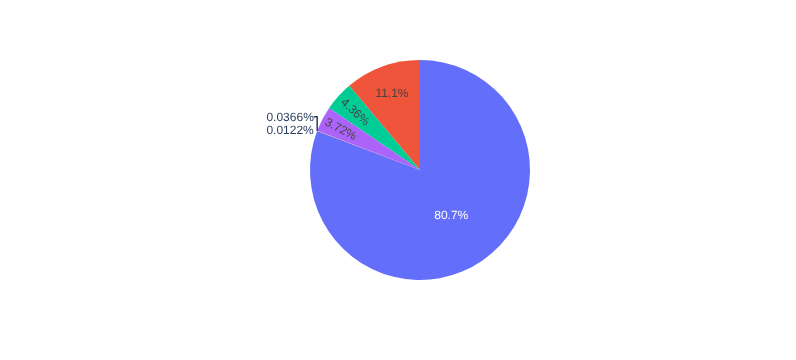

In [28]:
fig = px.pie(labels=ratings.index, values=ratings.values)
fig.show()

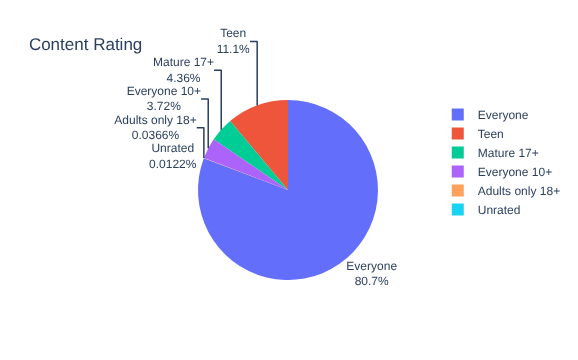

In [35]:
fig = px.pie(
    labels=ratings.index,
    values=ratings.values,
    title="Content Rating",
    names=ratings.index,
)
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

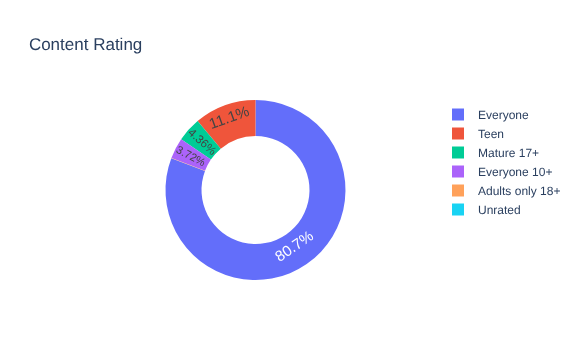

In [49]:
fig = px.pie(
    labels=ratings.index,
    values=ratings.values,
    title="Content Rating",
    names=ratings.index,
    hole=0.6,
)
fig.update_traces(textposition="inside", textinfo="percent", textfont_size=15)
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


### The most expensive apps sub $250

### Highest Grossing Paid Apps (ballpark estimate)

# Plotly Bar Charts & Scatter Plots: Analysing App Categories

### Vertical Bar Chart - Highest Competition (Number of Apps)

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

# Grouped Bar Charts: Free vs. Paid Apps per Category

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.